In [1]:
import os
import matplotlib.pyplot as plt
import re
import sys
import numpy as np
from scipy.stats import norm
import scipy.integrate as integrate

import pandas as pd
font_size=25
lw=4
line_w=lw

myblue = (0,119/235,187/235)
myred=(187/235,85/235,102/235)
myyellow=(221/235,170/235,51/235)
mygrey=(187/235,187/235,187/235)
mygreen="#66BB55"
mymagenta="#7733DD"
myblack="#48494B"
import matplotlib.ticker as mtick
plt.rc('xtick', labelsize=font_size) 
plt.rc('ytick', labelsize=font_size) 

def openCfile(file):
    """
    Open the C txt file in order to obtain a matrix of results 
    -----------
    Input
    -----------
    file: txt file
        a file containing the results from the C simulation

    Return
    -----------
    mat: list of list
        A matrix containing the results of the simulations 
    """
    with open(file) as f:
        cols = f.readlines() #columns in the txt file
    n_col = len(cols) #number of columns in the text file
    mat=[] # matrix 
    for i in range(n_col): # for each columns 
        elems_i=cols[i].split(" ") #split the elements using " "
        col_i=[] #create an empty column i 
        for elem in elems_i: #for each element of the list 
            if elem!="\n" and elem!=" ": #compare each elements and discard " " and "\n"
                col_i.append(float(elem)) #append elems that are floats to the vector of interest
        mat.append(col_i) #create the matrix
    mat=np.array(mat)
    return(mat) #return the value of the matrix.

## 1) Accuracy curve with potential with a=4, gamma=0.1

Underdamped results with both implementation (correction in Step B and in Step B )

In [2]:
a=4
b=0.1
x0=0.5
c=0.1
tau=1
# dtlist = np.array([np.exp(-3.93),np.exp(-3.36),np.exp(-2.79),np.exp(-2.21),np.exp(-1.64),np.exp(-1.07),np.exp(-0.5)])
def U(x):
    res = (a**1.5*b**0.5*x0*np.arctan((a/b)**0.5*(x-x0))+(a*b*(a*x0*(x-x0)-b))/(a*(x-x0)**2+b)+c*(x-x0)**2+2*c*(x-x0)*x0)*0.5
    return res

## When no access to the true moment
# ###########################################
# ## Range of integration + path to save figure
#############################################
range_int=[-100,100]
r0=range_int[0]
r1=range_int[1]
norm=np.round(integrate.quad(lambda q: np.exp(-U(q)/tau), r0,r1)[0],16)
true_mom_1 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*(q), r0,r1)[0],16)/norm
true_mom_2 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*q*q, r0,r1)[0],16)/norm
true_mom_3 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*(q)**3, r0,r1)[0],16)/norm
true_mom_4 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*q*q*q*q, r0,r1)[0],16)/norm

### plot potential

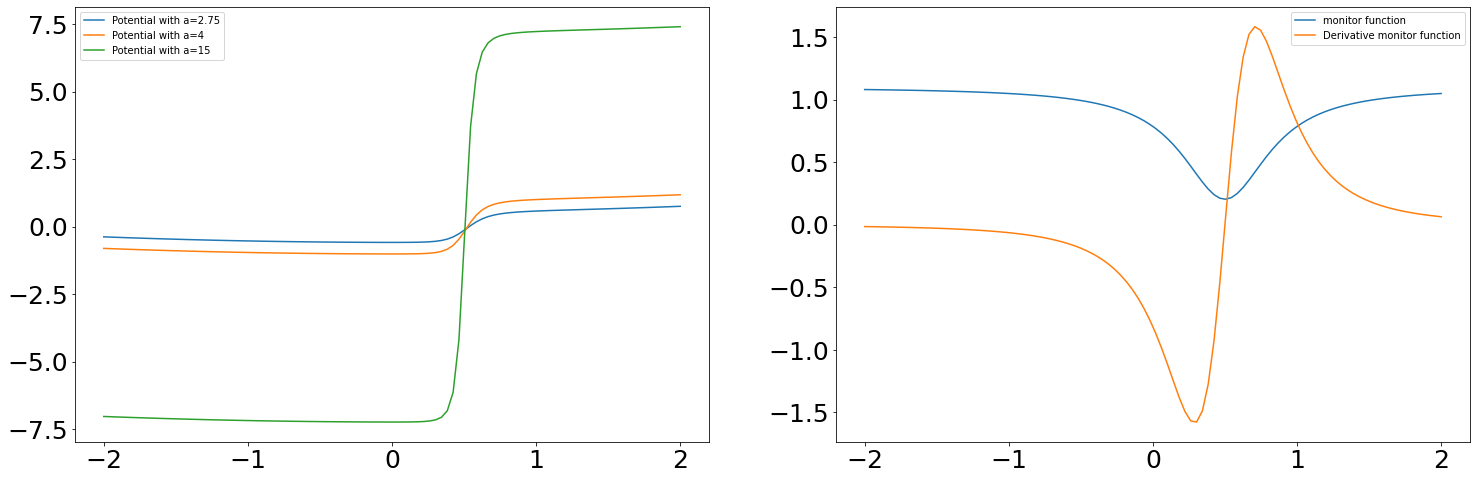

In [3]:
m=0.001
M=1.1
def getU(x,a):
    res = (a**1.5*b**0.5*x0*np.arctan((a/b)**0.5*(x-x0))+(a*b*(a*x0*(x-x0)-b))/(a*(x-x0)**2+b)+c*(x-x0)**2+2*c*(x-x0)*x0)*0.5
    return res
def getg(x):
     wx =(b/a+pow(x-x0,2))/b
     f = wx*wx
     xi = f+m*m
     g = 1/(1/M+1/np.sqrt(xi))
     return(g)

def getgprime(x):
     wx =(b/a+pow(x-x0,2))/b;
     f = wx*wx;
     fp = 4*(x-x0)*((b/a)+pow(x-x0,2))/(b*b);
     xi=np.sqrt(f+m*m);
     gprime= M*M*fp/(2*xi*(xi+M)*(xi+M));
     return(gprime);
fig, (ax1,ax2)= plt.subplots(1,2,figsize=(25,8))# plt.figure(figsize=(4,4))
xplot=np.linspace(-2,2,100)
ax1.plot(xplot,getU(xplot,2.75),label="Potential with a=2.75")
ax1.plot(xplot,getU(xplot,4),label="Potential with a=4")
ax1.plot(xplot,getU(xplot,15),label="Potential with a=15")

ax2.plot(xplot,getg(xplot),label="monitor function")
ax2.plot(xplot,getgprime(xplot),label="Derivative monitor function")
ax1.legend()
ax2.legend()

Text(0.5, 0, 'step size')

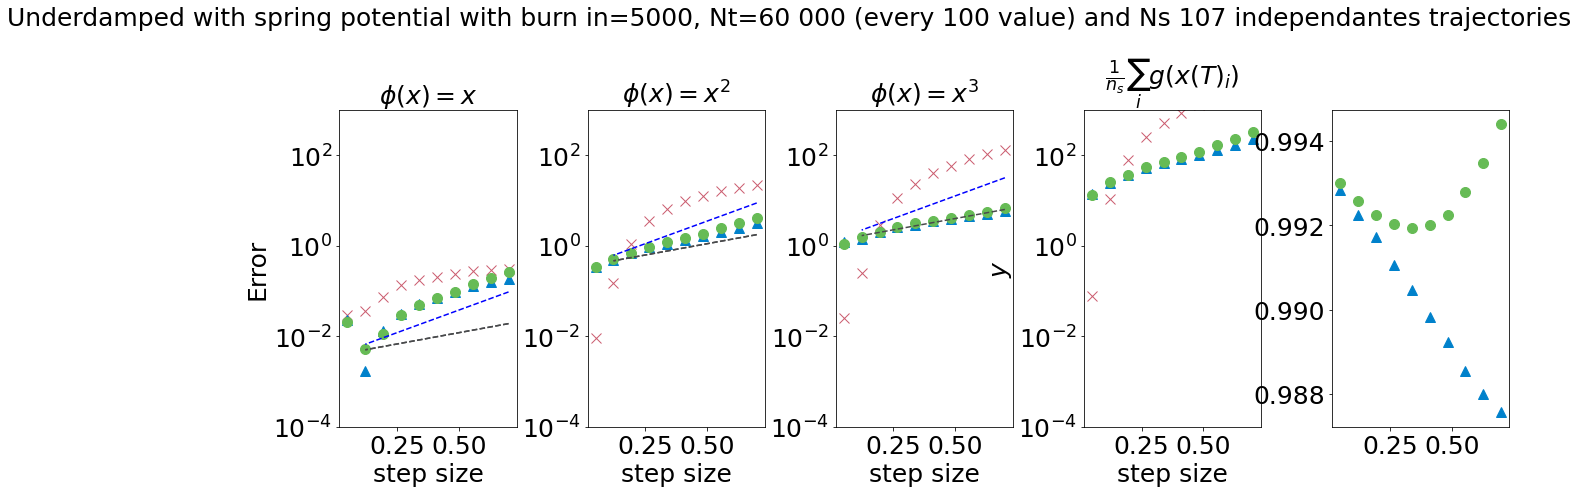

In [4]:
mksize=10
# ###########################################
# ## Set up the path
# ###########################################
path1="/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/data/eddie/29012024/spring_a4_gamma01/"
dtlist=np.array([0.7,0.6278,0.5556,0.4833,0.4111,0.3389,0.2667,0.1944,0.1222,0.05])


# ###########################################
# ## Interpolate the slope
# ###########################################
xm= (dtlist)

# ###########################################
# ## Compute the log moments
# ###########################################
fig, (ax1,ax2,ax3,ax4,ax5)= plt.subplots(1,5,figsize=(25,8))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.25,bottom=0.25, right=0.9, top=0.8, wspace=0.4, hspace=0.4)
fig.suptitle("Underdamped with spring potential with burn in=5000, Nt=60 000 (every 100 value) and Ns 107 independantes trajectories",fontsize=font_size)
## no adaptive 
###############
lab="Underdamped"

# Upload moments
mom1_list=np.hstack(openCfile(path1+"noada_moment1.txt"))
mom2_list=np.hstack(openCfile(path1+"noada_moment2.txt"))
mom3_list=np.hstack(openCfile(path1+"noada_moment3.txt"))
mom4_list=np.hstack(openCfile(path1+"noada_moment4.txt"))

mom1_list=np.abs(mom1_list-true_mom_1)
mom2_list=np.abs(mom2_list-true_mom_2)
mom3_list=np.abs(mom3_list-true_mom_3)
mom4_list=np.abs(mom4_list-true_mom_4)

#Plot moments
ax1.semilogy(xm,(mom1_list),"x",markersize=mksize,color=myred,label=lab)
ax2.semilogy(xm,(mom2_list),"x",markersize=mksize,color=myred,label=lab)
ax3.semilogy(xm,(mom3_list),"x",markersize=mksize,color=myred,label=lab)
ax4.semilogy(xm,(mom4_list),"x",markersize=mksize,color=myred,label=lab)


## Transformed correction in B 
################################
# lab="$\\hat{\\rm{B}}\\hat{\\rm{A}}\\rm{O}\\hat{\\rm{A}}\\hat{\\rm{B}}$"
lab = "Correction in step"
mom1_list,mom2_list,mom3_list,gvals=np.zeros(len(dtlist)),np.zeros(len(dtlist)),np.zeros(len(dtlist)),np.zeros(len(dtlist))

# Upload moments
mom1_list=np.hstack(openCfile(path1+"tr_moment1B.txt"))
mom2_list=np.hstack(openCfile(path1+"tr_moment2B.txt"))
mom3_list=np.hstack(openCfile(path1+"tr_moment3B.txt"))
mom4_list=np.hstack(openCfile(path1+"tr_moment4B.txt"))

gvals=np.hstack(openCfile(path1+"vec_g_B.txt"))

mom1_list=np.abs(mom1_list-true_mom_1)
mom2_list=np.abs(mom2_list-true_mom_2)
mom3_list=np.abs(mom3_list-true_mom_3)
mom4_list=np.abs(mom4_list-true_mom_4)

ax1.semilogy(xm,(mom1_list),"^",markersize=mksize,color=myblue,label=lab)
ax2.semilogy(xm,(mom2_list),"^",markersize=mksize,color=myblue,label=lab)
ax3.semilogy(xm,(mom3_list),"^",markersize=mksize,color=myblue,label=lab)
ax4.semilogy(xm,(mom4_list),"^",markersize=mksize,color=myblue,label=lab)
ax5.plot(xm,(gvals),"^",markersize=mksize,color=myblue,label=lab)


## Transformed correction in O 
################################
# lab="$\\hat{\\rm{B}}\\hat{\\rm{A}}\\rm{O}\\hat{\\rm{A}}\\hat{\\rm{B}}$"
lab = "Correction in step O"
mom1_list,mom2_list,mom3_list,gvals=np.zeros(len(dtlist)),np.zeros(len(dtlist)),np.zeros(len(dtlist)),np.zeros(len(dtlist))

# Upload moments
mom1_list=np.hstack(openCfile(path1+"tr_moment1O.txt"))
mom2_list=np.hstack(openCfile(path1+"tr_moment2O.txt"))
mom3_list=np.hstack(openCfile(path1+"tr_moment3O.txt"))
mom4_list=np.hstack(openCfile(path1+"tr_moment4O.txt"))

gvals=np.hstack(openCfile(path1+"vec_g_O.txt"))

mom1_list=np.abs(mom1_list-true_mom_1)
mom2_list=np.abs(mom2_list-true_mom_2)
mom3_list=np.abs(mom3_list-true_mom_3)
mom4_list=np.abs(mom4_list-true_mom_4)

ax1.semilogy(xm,(mom1_list),"o",markersize=mksize,color=mygreen,label=lab)
ax2.semilogy(xm,(mom2_list),"o",markersize=mksize,color=mygreen,label=lab)
ax3.semilogy(xm,(mom3_list),"o",markersize=mksize,color=mygreen,label=lab)
ax4.semilogy(xm,(mom4_list),"o",markersize=mksize,color=mygreen,label=lab)
ax5.plot(xm,(gvals),"o",markersize=mksize,color=mygreen,label=lab)


# ## Add the first order line 
lb=0
ub=-1 #len(dtlist)+1
x = (dtlist[lb:ub])
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, np.log10((mom1_list)[lb:ub]), rcond=None)[0]
ax1.semilogy(dtlist[lb:ub], 10**(1*x + c),"--",color=myblack,label="1st order line")
# ax1.text(dtlist[lb:ub][0]+.051,10**(m*x + c)[0]-0.00005,"$\\frac{\\Delta y}{\\Delta x}=$"+str(round(m,2)),color=myblue,rotation=0.,fontsize=font_size)
ax1.semilogy(dtlist[lb:ub], 10**(1*x + c),"--",color=myblack,label="1st order line")
ax1.semilogy(dtlist[lb:ub], 10**(2*x + c),"--",color="blue",label="2st order line")

x = (dtlist[lb:ub])
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, np.log10((mom2_list)[lb:ub]), rcond=None)[0]
ax2.semilogy(dtlist[lb:ub], 10**(1*x + c),"--",color=myblack) #label="$y=$"+str(round(m,2))+"$x$+"+str(round(c,2)),
# ax2.text(dtlist[lb:ub][0]+.051,10**(m*x + c)[0]-0.00005,"$\\frac{\\Delta y}{\\Delta x}=$"+str(round(m,2)),color=myblue,rotation=0.,fontsize=font_size)
ax2.semilogy(dtlist[lb:ub], 10**(1*x + c),"--",color=myblack,label="1st order line")
ax2.semilogy(dtlist[lb:ub], 10**(2*x + c),"--",color="blue",label="2st order line")

x = (dtlist[lb:ub])
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, np.log10((mom3_list)[lb:ub]), rcond=None)[0]
ax3.semilogy(dtlist[lb:ub], 10**(1*x + c),"--",color=myblack,label="1st order line")
ax3.semilogy(dtlist[lb:ub], 10**(2*x + c),"--",color="blue",label="2st order line")

ax1.set_ylim([10**(-4),10**3]) #change to -7.5 for a=2.5
ax2.set_ylim([10**(-4),10**3]) #change to -7.5 for a=2.5
ax3.set_ylim([10**(-4),10**3]) #change to -7.5 for a=2.5
ax4.set_ylim([10**(-4),10**3]) #change to -7.5 for a=2.5

ax1.set_ylim([10**(-4),10**3]) #change to -7.5 for a=2.5
ax2.set_ylim([10**(-4),10**3]) #change to -7.5 for a=2.5
ax3.set_ylim([10**(-4),10**3]) #change to -7.5 for a=2.5


#label of y axis 
ax1.set_title("$\\phi(x)=x$",fontsize=font_size)
ax2.set_title("$\\phi(x)=x^2$",fontsize=font_size)
ax3.set_title("$\\phi(x)=x^3$",fontsize=font_size)
ax4.set_title("$\\frac{1}{n_s}\\sum_{i} g(x(T)_i)$",fontsize=font_size)

# label of y axis
ax1.set_ylabel("Error",fontsize=font_size)
# ax2.set_ylabel("Error",fontsize=font_size)
# ax3.set_ylabel("Error",fontsize=font_size)
ax4.set_ylabel("$y$",fontsize=font_size)

# label of x axis
ax1.set_xlabel("step size",fontsize=font_size)
ax2.set_xlabel("step size",fontsize=font_size)
ax3.set_xlabel("step size",fontsize=font_size)
ax4.set_xlabel("step size",fontsize=font_size)


# fig.savefig("/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/eddie/visualisations/figures/moments_logplot_a25.eps",format="eps")

# fig.savefig("/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/eddie/visualisations/figures/moments_logplot_a25.pdf",format="pdf")



## When a=2.75 (less steep - closer to a harmonic potential) - these plots have less run so less accurate

In [5]:
a=2.75
b=0.1
x0=0.5
c=0.1
tau=1
# dtlist = np.array([np.exp(-3.93),np.exp(-3.36),np.exp(-2.79),np.exp(-2.21),np.exp(-1.64),np.exp(-1.07),np.exp(-0.5)])
def U(x):
    res = (a**1.5*b**0.5*x0*np.arctan((a/b)**0.5*(x-x0))+(a*b*(a*x0*(x-x0)-b))/(a*(x-x0)**2+b)+c*(x-x0)**2+2*c*(x-x0)*x0)*0.5
    return res

## When no access to the true moment
# ###########################################
# ## Range of integration + path to save figure
#############################################
range_int=[-100,100]
r0=range_int[0]
r1=range_int[1]
norm=np.round(integrate.quad(lambda q: np.exp(-U(q)/tau), r0,r1)[0],16)
true_mom_1 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*(q), r0,r1)[0],16)/norm
true_mom_2 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*q*q, r0,r1)[0],16)/norm
true_mom_3 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*(q)**3, r0,r1)[0],16)/norm
true_mom_4 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*q*q*q*q, r0,r1)[0],16)/norm

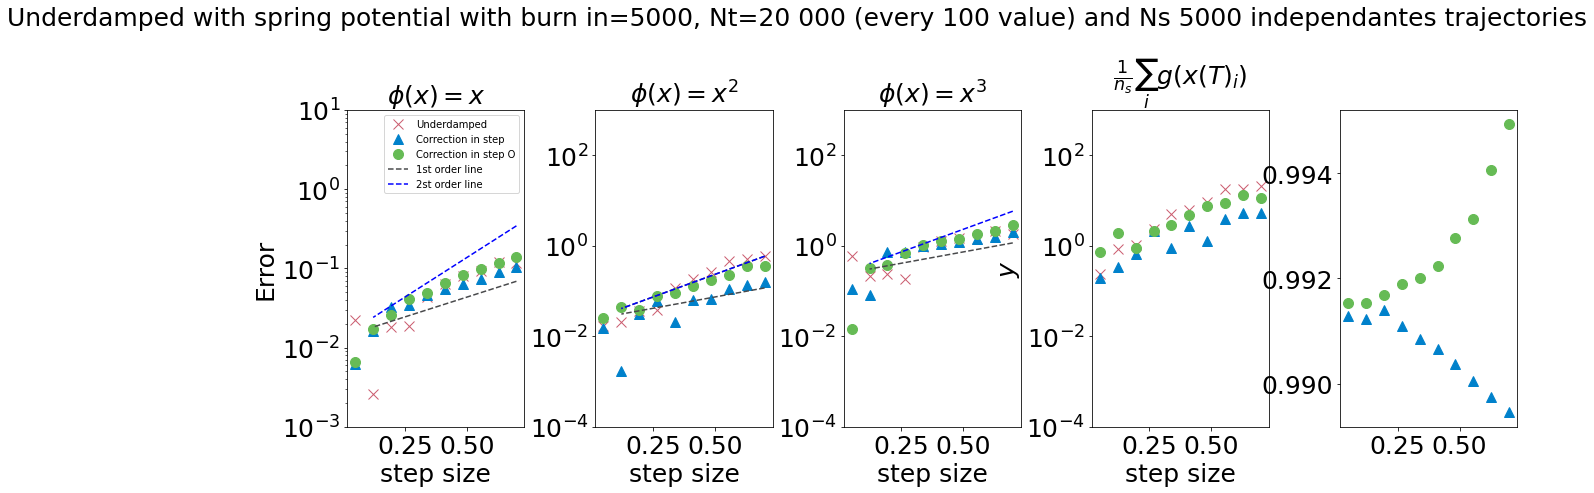

In [6]:
path1= "/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/data/C/underdamped/spring_validate/v1/"
mksize=10
# ###########################################
# ## Set up the path
# ###########################################
dtlist=np.array([0.7,0.6278,0.5556,0.4833,0.4111,0.3389,0.2667,0.1944,0.1222,0.05])


# ###########################################
# ## Interpolate the slope
# ###########################################
xm= (dtlist)

# ###########################################
# ## Compute the log moments
# ###########################################
fig, (ax1,ax2,ax3,ax4,ax5)= plt.subplots(1,5,figsize=(25,8))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.25,bottom=0.25, right=0.9, top=0.8, wspace=0.4, hspace=0.4)
fig.suptitle("Underdamped with spring potential with burn in=5000, Nt=20 000 (every 100 value) and Ns 5000 independantes trajectories",fontsize=font_size)
## no adaptive 
###############
lab="Underdamped"

# Upload moments
mom1_list=np.hstack(openCfile(path1+"noada_moment1.txt"))
mom2_list=np.hstack(openCfile(path1+"noada_moment2.txt"))
mom3_list=np.hstack(openCfile(path1+"noada_moment3.txt"))
mom4_list=np.hstack(openCfile(path1+"noada_moment4.txt"))

mom1_list=np.abs(mom1_list-true_mom_1)
mom2_list=np.abs(mom2_list-true_mom_2)
mom3_list=np.abs(mom3_list-true_mom_3)
mom4_list=np.abs(mom4_list-true_mom_4)

#Plot moments
ax1.semilogy(xm,(mom1_list),"x",markersize=mksize,color=myred,label=lab)
ax2.semilogy(xm,(mom2_list),"x",markersize=mksize,color=myred,label=lab)
ax3.semilogy(xm,(mom3_list),"x",markersize=mksize,color=myred,label=lab)
ax4.semilogy(xm,(mom4_list),"x",markersize=mksize,color=myred,label=lab)


## Transformed correction in B 
################################
# lab="$\\hat{\\rm{B}}\\hat{\\rm{A}}\\rm{O}\\hat{\\rm{A}}\\hat{\\rm{B}}$"
lab = "Correction in step"
mom1_list,mom2_list,mom3_list,gvals=np.zeros(len(dtlist)),np.zeros(len(dtlist)),np.zeros(len(dtlist)),np.zeros(len(dtlist))

# Upload moments
mom1_list=np.hstack(openCfile(path1+"tr_moment1B.txt"))
mom2_list=np.hstack(openCfile(path1+"tr_moment2B.txt"))
mom3_list=np.hstack(openCfile(path1+"tr_moment3B.txt"))
mom4_list=np.hstack(openCfile(path1+"tr_moment4B.txt"))

gvals=np.hstack(openCfile(path1+"vec_g_B.txt"))

mom1_list=np.abs(mom1_list-true_mom_1)
mom2_list=np.abs(mom2_list-true_mom_2)
mom3_list=np.abs(mom3_list-true_mom_3)
mom4_list=np.abs(mom4_list-true_mom_4)

ax1.semilogy(xm,(mom1_list),"^",markersize=mksize,color=myblue,label=lab)
ax2.semilogy(xm,(mom2_list),"^",markersize=mksize,color=myblue,label=lab)
ax3.semilogy(xm,(mom3_list),"^",markersize=mksize,color=myblue,label=lab)
ax4.semilogy(xm,(mom4_list),"^",markersize=mksize,color=myblue,label=lab)
ax5.plot(xm,(gvals),"^",markersize=mksize,color=myblue,label=lab)


## Transformed correction in O 
################################
# lab="$\\hat{\\rm{B}}\\hat{\\rm{A}}\\rm{O}\\hat{\\rm{A}}\\hat{\\rm{B}}$"
lab = "Correction in step O"
mom1_list,mom2_list,mom3_list,gvals=np.zeros(len(dtlist)),np.zeros(len(dtlist)),np.zeros(len(dtlist)),np.zeros(len(dtlist))

# Upload moments
mom1_list=np.hstack(openCfile(path1+"tr_moment1O.txt"))
mom2_list=np.hstack(openCfile(path1+"tr_moment2O.txt"))
mom3_list=np.hstack(openCfile(path1+"tr_moment3O.txt"))
mom4_list=np.hstack(openCfile(path1+"tr_moment4O.txt"))

gvals=np.hstack(openCfile(path1+"vec_g_O.txt"))

mom1_list=np.abs(mom1_list-true_mom_1)
mom2_list=np.abs(mom2_list-true_mom_2)
mom3_list=np.abs(mom3_list-true_mom_3)
mom4_list=np.abs(mom4_list-true_mom_4)

ax1.semilogy(xm,(mom1_list),"o",markersize=mksize,color=mygreen,label=lab)
ax2.semilogy(xm,(mom2_list),"o",markersize=mksize,color=mygreen,label=lab)
ax3.semilogy(xm,(mom3_list),"o",markersize=mksize,color=mygreen,label=lab)
ax4.semilogy(xm,(mom4_list),"o",markersize=mksize,color=mygreen,label=lab)
ax5.plot(xm,(gvals),"o",markersize=mksize,color=mygreen,label=lab)


# ## Add the first order line 
lb=0
ub=-1 #len(dtlist)+1
x = (dtlist[lb:ub])
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, np.log10((mom1_list)[lb:ub]), rcond=None)[0]
ax1.semilogy(dtlist[lb:ub], 10**(1*x + c),"--",color=myblack,label="1st order line")
ax1.semilogy(dtlist[lb:ub], 10**(2*x + c),"--",color="blue",label="2st order line")
# ax1.text(dtlist[lb:ub][0]+.051,10**(m*x + c)[0]-0.00005,"$\\frac{\\Delta y}{\\Delta x}=$"+str(round(m,2)),color=myblue,rotation=0.,fontsize=font_size)

x = (dtlist[lb:ub])
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, np.log10((mom2_list)[lb:ub]), rcond=None)[0]
ax2.semilogy(dtlist[lb:ub], 10**(2*x + c),"--",color=myblack) #label="$y=$"+str(round(m,2))+"$x$+"+str(round(c,2)),
ax2.semilogy(dtlist[lb:ub], 10**(1*x + c),"--",color=myblack,label="1st order line")
ax2.semilogy(dtlist[lb:ub], 10**(2*x + c),"--",color="blue",label="2st order line")
# ax1.text(dtlist[lb:ub][0]+.051,10**(m*x + c)[0]-0.00005,"$\\frac{\\Delta y}{\\Delta x}=$"+str(round(m,2)),color=myblue,rotation=0.,fontsize=font_size)

x = (dtlist[lb:ub])
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, np.log10((mom3_list)[lb:ub]), rcond=None)[0]
ax3.semilogy(dtlist[lb:ub], 10**(1*x + c),"--",color=myblack,label="1st order line")
ax3.semilogy(dtlist[lb:ub], 10**(2*x + c),"--",color="blue",label="2st order line")
# ax1.text(dtlist[lb:ub][0]+.051,10**(m*x + c)[0]-0.00005,"$\\frac{\\Delta y}{\\Delta x}=$"+str(round(m,2)),color=myblue,rotation=0.,fontsize=font_size)

ax1.set_ylim([10**(-3),10**1]) #change to -7.5 for a=2.5
ax2.set_ylim([10**(-4),10**3]) #change to -7.5 for a=2.5
ax3.set_ylim([10**(-4),10**3]) #change to -7.5 for a=2.5
ax4.set_ylim([10**(-4),10**3]) #change to -7.5 for a=2.5



#label of y axis 
ax1.set_title("$\\phi(x)=x$",fontsize=font_size)
ax2.set_title("$\\phi(x)=x^2$",fontsize=font_size)
ax3.set_title("$\\phi(x)=x^3$",fontsize=font_size)
ax4.set_title("$\\frac{1}{n_s}\\sum_{i} g(x(T)_i)$",fontsize=font_size)

# label of y axis
ax1.set_ylabel("Error",fontsize=font_size)
# ax2.set_ylabel("Error",fontsize=font_size)
# ax3.set_ylabel("Error",fontsize=font_size)
ax4.set_ylabel("$y$",fontsize=font_size)

# label of x axis
ax1.set_xlabel("step size",fontsize=font_size)
ax2.set_xlabel("step size",fontsize=font_size)
ax3.set_xlabel("step size",fontsize=font_size)
ax4.set_xlabel("step size",fontsize=font_size)

ax1.legend()

## 2) Accuracy curve with potential with a=15, gamma=0.1


In [7]:
a=15
b=0.1
x0=0.5
c=0.1
tau=1
def U(x):
    res = (a**1.5*b**0.5*x0*np.arctan((a/b)**0.5*(x-x0))+(a*b*(a*x0*(x-x0)-b))/(a*(x-x0)**2+b)+c*(x-x0)**2+2*c*(x-x0)*x0)*0.5
    return res

# # dtlist = np.array([np.exp(-3.93),np.exp(-3.36),np.exp(-2.79),np.exp(-2.21),np.exp(-1.64),np.exp(-1.07),np.exp(-0.5)])
# def U(x):
#     res = (a**1.5*b**0.5*x0*np.arctan((a/b)**0.5*(x-x0))+(a*b*(a*x0*(x-x0)-b))/(a*(x-x0)**2+b)+c*(x-x0)**2+2*c*(x-x0)*x0)*0.5
#     return res

## When no access to the true moment
# ###########################################
# ## Range of integration + path to save figure
#############################################
range_int=[-10,10]
r0=range_int[0]
r1=range_int[1]
norm=np.round(integrate.quad(lambda q: np.exp(-U(q)/tau), r0,r1)[0],16)
true_mom_1 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*(q), r0,r1)[0],16)/norm
true_mom_2 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*q*q, r0,r1)[0],16)/norm
true_mom_3 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*q*q*q, r0,r1)[0],16)/norm
true_mom_4 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*q*q*q*q, r0,r1)[0],16)/norm

print(true_mom_1)
print(true_mom_2)
print(true_mom_3)
print(true_mom_4)

-2.262125861792849
8.93316086592814
-44.0450176452506
252.3478167520492


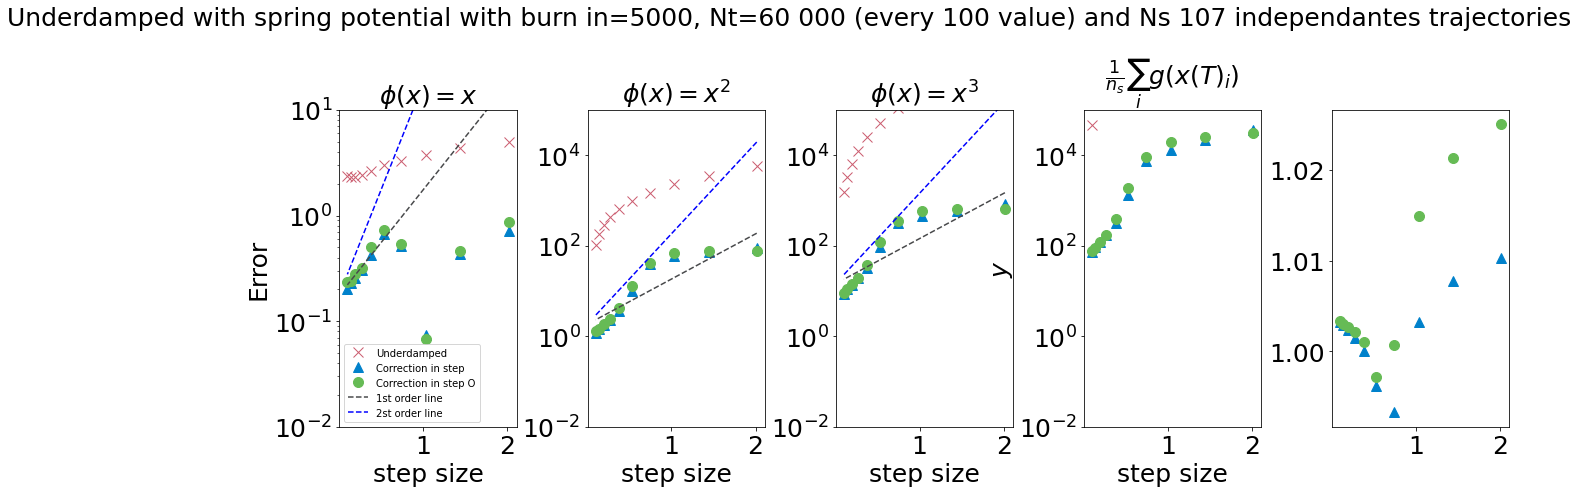

In [26]:
mksize=10
# ###########################################
# ## Set up the path
# ###########################################
path1="/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/data/eddie/29012024/spring_a15_gamma01/"
#dtlist=np.array([0.7,0.6278,0.5556,0.4833,0.4111,0.3389,0.2667,0.1944,0.1222,0.05])
dtlist=np.array([2.014,1.443,1.034,0.741,0.531,0.38,0.273,0.195,0.14,0.1])


# ###########################################
# ## Interpolate the slope
# ###########################################
xm= (dtlist)

# ###########################################
# ## Compute the log moments
# ###########################################
fig, (ax1,ax2,ax3,ax4,ax5)= plt.subplots(1,5,figsize=(25,8))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.25,bottom=0.25, right=0.9, top=0.8, wspace=0.4, hspace=0.4)
fig.suptitle("Underdamped with spring potential with burn in=5000, Nt=60 000 (every 100 value) and Ns 107 independantes trajectories",fontsize=font_size)
## no adaptive 
###############
lab="Underdamped"

# Upload moments
mom1_list=np.hstack(openCfile(path1+"noada_moment1.txt"))
mom2_list=np.hstack(openCfile(path1+"noada_moment2.txt"))
mom3_list=np.hstack(openCfile(path1+"noada_moment3.txt"))
mom4_list=np.hstack(openCfile(path1+"noada_moment4.txt"))

mom1_list=np.abs(mom1_list-true_mom_1)
mom2_list=np.abs(mom2_list-true_mom_2)
mom3_list=np.abs(mom3_list-true_mom_3)
mom4_list=np.abs(mom4_list-true_mom_4)

#Plot moments
ax1.semilogy(xm,(mom1_list),"x",markersize=mksize,color=myred,label=lab)
ax2.semilogy(xm,(mom2_list),"x",markersize=mksize,color=myred,label=lab)
ax3.semilogy(xm,(mom3_list),"x",markersize=mksize,color=myred,label=lab)
ax4.semilogy(xm,(mom4_list),"x",markersize=mksize,color=myred,label=lab)


## Transformed correction in B 
################################
# lab="$\\hat{\\rm{B}}\\hat{\\rm{A}}\\rm{O}\\hat{\\rm{A}}\\hat{\\rm{B}}$"
lab = "Correction in step"
mom1_list,mom2_list,mom3_list,gvals=np.zeros(len(dtlist)),np.zeros(len(dtlist)),np.zeros(len(dtlist)),np.zeros(len(dtlist))

# Upload moments
mom1_list=np.hstack(openCfile(path1+"tr_moment1B.txt"))
mom2_list=np.hstack(openCfile(path1+"tr_moment2B.txt"))
mom3_list=np.hstack(openCfile(path1+"tr_moment3B.txt"))
mom4_list=np.hstack(openCfile(path1+"tr_moment4B.txt"))

gvals=np.hstack(openCfile(path1+"vec_g_B.txt"))

mom1_list=np.abs(mom1_list-true_mom_1)
mom2_list=np.abs(mom2_list-true_mom_2)
mom3_list=np.abs(mom3_list-true_mom_3)
mom4_list=np.abs(mom4_list-true_mom_4)

ax1.semilogy(xm,(mom1_list),"^",markersize=mksize,color=myblue,label=lab)
ax2.semilogy(xm,(mom2_list),"^",markersize=mksize,color=myblue,label=lab)
ax3.semilogy(xm,(mom3_list),"^",markersize=mksize,color=myblue,label=lab)
ax4.semilogy(xm,(mom4_list),"^",markersize=mksize,color=myblue,label=lab)
ax5.plot(xm,(gvals),"^",markersize=mksize,color=myblue,label=lab)


## Transformed correction in O 
################################
# lab="$\\hat{\\rm{B}}\\hat{\\rm{A}}\\rm{O}\\hat{\\rm{A}}\\hat{\\rm{B}}$"
lab = "Correction in step O"
mom1_list,mom2_list,mom3_list,gvals=np.zeros(len(dtlist)),np.zeros(len(dtlist)),np.zeros(len(dtlist)),np.zeros(len(dtlist))

# Upload moments
mom1_list=np.hstack(openCfile(path1+"tr_moment1O.txt"))
mom2_list=np.hstack(openCfile(path1+"tr_moment2O.txt"))
mom3_list=np.hstack(openCfile(path1+"tr_moment3O.txt"))
mom4_list=np.hstack(openCfile(path1+"tr_moment4O.txt"))

gvals=np.hstack(openCfile(path1+"vec_g_O.txt"))

mom1_list=np.abs(mom1_list-true_mom_1)
mom2_list=np.abs(mom2_list-true_mom_2)
mom3_list=np.abs(mom3_list-true_mom_3)
mom4_list=np.abs(mom4_list-true_mom_4)

ax1.semilogy(xm,(mom1_list),"o",markersize=mksize,color=mygreen,label=lab)
ax2.semilogy(xm,(mom2_list),"o",markersize=mksize,color=mygreen,label=lab)
ax3.semilogy(xm,(mom3_list),"o",markersize=mksize,color=mygreen,label=lab)
ax4.semilogy(xm,(mom4_list),"o",markersize=mksize,color=mygreen,label=lab)
ax5.plot(xm,(gvals),"o",markersize=mksize,color=mygreen,label=lab)


# ## Add the first order line 
lb=0
ub=len(dtlist) #len(dtlist)+1
x = (dtlist[lb:ub])
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, np.log10((mom1_list)[lb:ub]), rcond=None)[0]
ax1.semilogy(dtlist[lb:ub], 10**(1*x + c-0.2),"--",color=myblack,label="1st order line")
ax1.semilogy(dtlist[lb:ub], 10**(2*x + c-0.2),"--",color="blue",label="2st order line")
# ax1.text(dtlist[lb:ub][0]+.051,10**(m*x + c)[0]-0.00005,"$\\frac{\\Delta y}{\\Delta x}=$"+str(round(m,2)),color=myblue,rotation=0.,fontsize=font_size)

x = (dtlist[lb:ub])
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, np.log10((mom2_list)[lb:ub]), rcond=None)[0]
ax2.semilogy(dtlist[lb:ub], 10**(1*x + c),"--",color=myblack,label="1st order line")
ax2.semilogy(dtlist[lb:ub], 10**(2*x + c),"--",color="blue",label="2st order line")
# ax1.text(dtlist[lb:ub][0]+.051,10**(m*x + c)[0]-0.00005,"$\\frac{\\Delta y}{\\Delta x}=$"+str(round(m,2)),color=myblue,rotation=0.,fontsize=font_size)

x = (dtlist[lb:ub])
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, np.log10((mom3_list)[lb:ub]), rcond=None)[0]
ax3.semilogy(dtlist[lb:ub], 10**(1*x + c),"--",color=myblack,label="1st order line")
ax3.semilogy(dtlist[lb:ub], 10**(2*x + c),"--",color="blue",label="2st order line")
# ax1.text(dtlist[lb:ub][0]+.051,10**(m*x + c)[0]-0.00005,"$\\frac{\\Delta y}{\\Delta x}=$"+str(round(m,2)),color=myblue,rotation=0.,fontsize=font_size)

ax1.set_ylim([10**(-2),10**1]) #change to -7.5 for a=2.5
ax2.set_ylim([10**(-2),10**5]) #change to -7.5 for a=2.5
ax3.set_ylim([10**(-2),10**5]) #change to -7.5 for a=2.5
ax4.set_ylim([10**(-2),10**5]) #change to -7.5 for a=2.5



#label of y axis 
ax1.set_title("$\\phi(x)=x$",fontsize=font_size)
ax2.set_title("$\\phi(x)=x^2$",fontsize=font_size)
ax3.set_title("$\\phi(x)=x^3$",fontsize=font_size)
ax4.set_title("$\\frac{1}{n_s}\\sum_{i} g(x(T)_i)$",fontsize=font_size)

# label of y axis
ax1.set_ylabel("Error",fontsize=font_size)
# ax2.set_ylabel("Error",fontsize=font_size)
# ax3.set_ylabel("Error",fontsize=font_size)
ax4.set_ylabel("$y$",fontsize=font_size)

# label of x axis
ax1.set_xlabel("step size",fontsize=font_size)
ax2.set_xlabel("step size",fontsize=font_size)
ax3.set_xlabel("step size",fontsize=font_size)
ax4.set_xlabel("step size",fontsize=font_size)

ax1.legend()
# fig.savefig("/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/eddie/visualisations/figures/moments_logplot_a25.eps",format="eps")

# fig.savefig("/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/eddie/visualisations/figures/moments_logplot_a25.pdf",format="pdf")



## 3) Accuracy curve with potential with a=15, gamma=0.1, smaller range of dt


In [9]:
np.round(np.linspace(0.1222,0.01,5),4)

array([0.1222, 0.0942, 0.0661, 0.038 , 0.01  ])

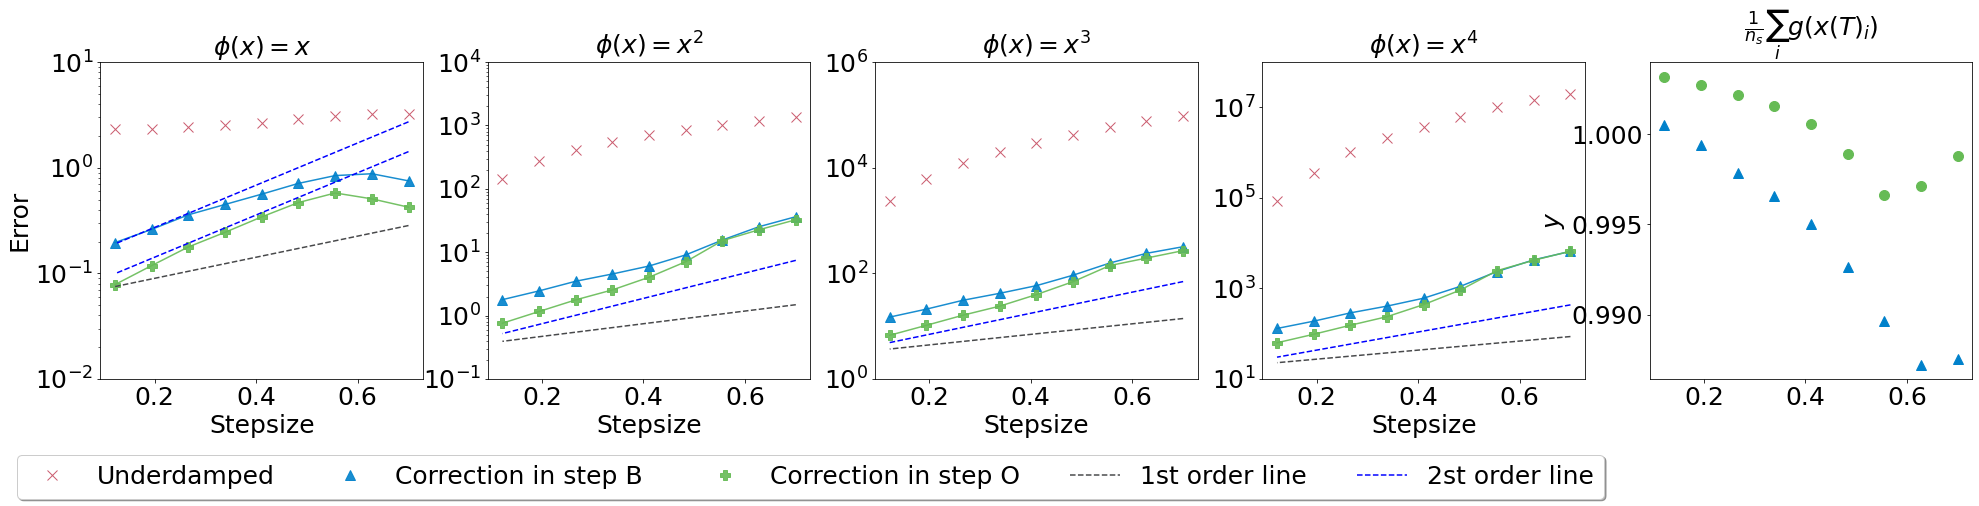

In [59]:
mksize=10
# ###########################################
# ## Set up the path
# ###########################################
path1="/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/data/eddie/29012024/spring_a15_gamma01_smalldt/"
#dtlist=np.array([0.7,0.6278,0.5556,0.4833,0.4111,0.3389,0.2667,0.1944,0.1222,0.05])
dtlist=np.array([2.014,1.443,1.034,0.741,0.531,0.38,0.273,0.195,0.14,0.1])
dtlist=np.array([0.7,0.6278,0.5556,0.4833,0.4111,0.3389,0.2667,0.1944,0.1222])


# ###########################################
# ## Interpolate the slope
# ###########################################
xm= (dtlist)

# ###########################################
# ## Compute the log moments
# ###########################################
fig, (ax1,ax2,ax3,ax4,ax5)= plt.subplots(1,5,figsize=(40,8))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.25,bottom=0.25, right=0.9, top=0.8, wspace=0.2, hspace=0.4)
# fig.suptitle("Underdamped with spring potential with burn in=5000, Nt=60 000 (every 100 value) and Ns 107 independantes trajectories",fontsize=font_size)
## no adaptive 
###############
lab="Underdamped"

# Upload moments
mom1_list=np.hstack(openCfile(path1+"noada_moment1.txt"))[0:-1]
mom2_list=np.hstack(openCfile(path1+"noada_moment2.txt"))[0:-1]
mom3_list=np.hstack(openCfile(path1+"noada_moment3.txt"))[0:-1]
mom4_list=np.hstack(openCfile(path1+"noada_moment4.txt"))[0:-1]

mom1_list=np.abs(mom1_list-true_mom_1)
mom2_list=np.abs(mom2_list-true_mom_2)
mom3_list=np.abs(mom3_list-true_mom_3)
mom4_list=np.abs(mom4_list-true_mom_4)

#Plot moments
ax1.semilogy(xm,(mom1_list),"x",markersize=mksize,color=myred,label=lab)
ax2.semilogy(xm,(mom2_list),"x",markersize=mksize,color=myred,label=lab)
ax3.semilogy(xm,(mom3_list),"x",markersize=mksize,color=myred,label=lab)
ax4.semilogy(xm,(mom4_list),"x",markersize=mksize,color=myred,label=lab)


## Transformed correction in B 
################################
# lab="$\\hat{\\rm{B}}\\hat{\\rm{A}}\\rm{O}\\hat{\\rm{A}}\\hat{\\rm{B}}$"
lab = "Correction in step B "
mom1_list,mom2_list,mom3_list,gvals=np.zeros(len(dtlist)),np.zeros(len(dtlist)),np.zeros(len(dtlist)),np.zeros(len(dtlist))

# Upload moments
mom1_list=np.hstack(openCfile(path1+"tr_moment1B.txt"))[0:-1]
mom2_list=np.hstack(openCfile(path1+"tr_moment2B.txt"))[0:-1]
mom3_list=np.hstack(openCfile(path1+"tr_moment3B.txt"))[0:-1]
mom4_list=np.hstack(openCfile(path1+"tr_moment4B.txt"))[0:-1]

gvals=np.hstack(openCfile(path1+"vec_g_B.txt"))[0:-1]

mom1_list=np.abs(mom1_list-true_mom_1)
mom2_list=np.abs(mom2_list-true_mom_2)
mom3_list=np.abs(mom3_list-true_mom_3)
mom4_list=np.abs(mom4_list-true_mom_4)

ax1.semilogy(xm,(mom1_list),"^",markersize=mksize,color=myblue,alpha=0.9,label=lab)
ax2.semilogy(xm,(mom2_list),"^",markersize=mksize,color=myblue,alpha=0.9,label=lab)
ax3.semilogy(xm,(mom3_list),"^",markersize=mksize,color=myblue,alpha=0.9,label=lab)
ax4.semilogy(xm,(mom4_list),"^",markersize=mksize,color=myblue,alpha=0.9,label=lab)

ax1.semilogy(xm,(mom1_list),color=myblue,alpha=0.9)
ax2.semilogy(xm,(mom2_list),color=myblue,alpha=0.9)
ax3.semilogy(xm,(mom3_list),color=myblue,alpha=0.9)
ax4.semilogy(xm,(mom4_list),color=myblue,alpha=0.9)

ax5.plot(xm,(gvals),"^",markersize=mksize,color=myblue,label=lab)

# ## Add the first order line 
lb=0
ub=len(dtlist) #len(dtlist)+1
x = (dtlist[lb:ub])
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, np.log10((mom1_list)[lb:ub]), rcond=None)[0]
# ax1.semilogy(dtlist[lb:ub], 10**(1*x + c),"--",color=myblack,label="1st order line")
ax1.semilogy(dtlist[lb:ub], 10**(2*x + c-0.2),"--",color="blue")
# ax1.text(dtlist[lb:ub][0]+.051,10**(m*x + c)[0]-0.00005,"$\\frac{\\Delta y}{\\Delta x}=$"+str(round(m,2)),color=myblue,rotation=0.,fontsize=font_size)



## Transformed correction in O 
################################
# lab="$\\hat{\\rm{B}}\\hat{\\rm{A}}\\rm{O}\\hat{\\rm{A}}\\hat{\\rm{B}}$"
lab = "Correction in step O"
mom1_list,mom2_list,mom3_list,gvals=np.zeros(len(dtlist)),np.zeros(len(dtlist)),np.zeros(len(dtlist)),np.zeros(len(dtlist))

# Upload moments
mom1_list=np.hstack(openCfile(path1+"tr_moment1O.txt"))[0:-1]
mom2_list=np.hstack(openCfile(path1+"tr_moment2O.txt"))[0:-1]
mom3_list=np.hstack(openCfile(path1+"tr_moment3O.txt"))[0:-1]
mom4_list=np.hstack(openCfile(path1+"tr_moment4O.txt"))[0:-1]

gvals=np.hstack(openCfile(path1+"vec_g_O.txt"))[0:-1]

mom1_list=np.abs(mom1_list-true_mom_1)
mom2_list=np.abs(mom2_list-true_mom_2)
mom3_list=np.abs(mom3_list-true_mom_3)
mom4_list=np.abs(mom4_list-true_mom_4)

ax1.semilogy(xm,(mom1_list),"P",markersize=mksize,color=mygreen,alpha=0.9,label=lab)
ax2.semilogy(xm,(mom2_list),"P",markersize=mksize,color=mygreen,alpha=0.9,label=lab)
ax3.semilogy(xm,(mom3_list),"P",markersize=mksize,color=mygreen,alpha=0.9,label=lab)
ax4.semilogy(xm,(mom4_list),"P",markersize=mksize,color=mygreen,alpha=0.9,label=lab)

ax1.semilogy(xm,(mom1_list),color=mygreen,alpha=0.9)
ax2.semilogy(xm,(mom2_list),color=mygreen,alpha=0.9)
ax3.semilogy(xm,(mom3_list),color=mygreen,alpha=0.9)
ax4.semilogy(xm,(mom4_list),color=mygreen,alpha=0.9)
ax5.plot(xm,(gvals),"o",markersize=mksize,color=mygreen,label=lab)


# ## Add the first order line 
lb=0
ub=len(dtlist) #len(dtlist)+1
x = (dtlist[lb:ub])
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, np.log10((mom1_list)[lb:ub]), rcond=None)[0]
ax1.semilogy(dtlist[lb:ub], 10**(1*x + c-0.1),"--",color=myblack,label="1st order line")
ax1.semilogy(dtlist[lb:ub], 10**(2*x + c-0.1),"--",color="blue",label="2st order line")
# ax1.text(dtlist[lb:ub][0]+.051,10**(m*x + c)[0]-0.00005,"$\\frac{\\Delta y}{\\Delta x}=$"+str(round(m,2)),color=myblue,rotation=0.,fontsize=font_size)

x = (dtlist[lb:ub])
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, np.log10((mom2_list)[lb:ub]), rcond=None)[0]
ax2.semilogy(dtlist[lb:ub], 10**(1*x + c),"--",color=myblack,label="1st order line")
ax2.semilogy(dtlist[lb:ub], 10**(2*x + c),"--",color="blue",label="2st order line")
# ax1.text(dtlist[lb:ub][0]+.051,10**(m*x + c)[0]-0.00005,"$\\frac{\\Delta y}{\\Delta x}=$"+str(round(m,2)),color=myblue,rotation=0.,fontsize=font_size)

x = (dtlist[lb:ub])
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, np.log10((mom3_list)[lb:ub]), rcond=None)[0]
ax3.semilogy(dtlist[lb:ub], 10**(1*x + c),"--",color=myblack,label="1st order line")
ax3.semilogy(dtlist[lb:ub], 10**(2*x + c),"--",color="blue",label="2st order line")
# ax1.text(dtlist[lb:ub][0]+.051,10**(m*x + c)[0]-0.00005,"$\\frac{\\Delta y}{\\Delta x}=$"+str(round(m,2)),color=myblue,rotation=0.,fontsize=font_size)


x = (dtlist[lb:ub])
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, np.log10((mom4_list)[lb:ub]), rcond=None)[0]
ax4.semilogy(dtlist[lb:ub], 10**(1*x + c),"--",color=myblack,label="1st order line")
ax4.semilogy(dtlist[lb:ub], 10**(2*x + c),"--",color="blue",label="2st order line")
# ax1.text(dtlist[lb:ub][0]+.051,10**(m*x + c)[0]-0.00005,"$\\frac{\\Delta y}{\\Delta x}=$"+str(round(m,2)),color=myblue,rotation=0.,fontsize=font_size)

ax1.set_ylim([10**(-2),10**1]) #change to -7.5 for a=2.5
ax2.set_ylim([10**(-1),10**4]) #change to -7.5 for a=2.5
ax3.set_ylim([10**(-0),10**6]) #change to -7.5 for a=2.5
ax4.set_ylim([10**(1),10**8]) #change to -7.5 for a=2.5


#label of y axis 
ax1.set_title("$\\phi(x)=x$",fontsize=font_size)
ax2.set_title("$\\phi(x)=x^2$",fontsize=font_size)
ax3.set_title("$\\phi(x)=x^3$",fontsize=font_size)
ax4.set_title("$\\phi(x)=x^4$",fontsize=font_size)

ax5.set_title("$\\frac{1}{n_s}\\sum_{i} g(x(T)_i)$",fontsize=font_size)

# label of y axis
ax1.set_ylabel("Error",fontsize=font_size)
# ax2.set_ylabel("Error",fontsize=font_size)
# ax3.set_ylabel("Error",fontsize=font_size)
ax5.set_ylabel("$y$",fontsize=font_size)

# label of x axis
ax1.set_xlabel("Stepsize",fontsize=font_size)
ax2.set_xlabel("Stepsize",fontsize=font_size)
ax3.set_xlabel("Stepsize",fontsize=font_size)
ax4.set_xlabel("Stepsize",fontsize=font_size)

ax1.legend(loc='upper center', bbox_to_anchor=(2.2, -0.2),fontsize=font_size,
          fancybox=True, shadow=True, ncol=5)

# fig.savefig("/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/eddie/visualisations/figures/moments_logplot_a25.eps",format="eps")

# fig.savefig("/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/eddie/visualisations/figures/moments_logplot_a25.pdf",format="pdf")
